In [1]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

# 1. `reuters`를 이용한 다중 클래스 분류

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, )

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
X_train

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 2, 699, 2, 2, 56, 2, 2, 9, 56, 2, 2, 81, 5, 2, 57, 366, 737, 132, 20, 2, 7, 2, 49, 2, 2, 2, 2, 699, 2, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2, 2, 2, 775, 7, 48, 34, 191, 44, 35, 2, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 2, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 2, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 2, 55, 2, 92, 617, 80, 2, 46, 905, 220, 13,

In [4]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [5]:
# OHE
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Embedding(1000, 120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.fit(X_train, y_train, batch_size=128, epochs=1, validation_data=(X_test, y_test)) 

71/71 [==============================] - 26s 360ms/step - loss: 2.6109 - acc: 0.3393 - val_loss: 2.4025 - val_acc: 0.3620


epoch 10\~15번 반복하면 60\~70%까지 올라감

# 2. kaggle data를 이용한 뉴스 카테고리 분류 실습

In [8]:
import os
os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

news_data = pd.read_json('./data/News_Category_Dataset_v2.json', lines=True)
news_data = news_data.loc[:, ["category", "headline"]]

# 카테고리를 숫자로 변경
news_data.category = pd.Categorical(news_data.category)
news_data.category = news_data.category.cat.codes 


# 단어만 남기고 공백 제거
news_data['headline'] = news_data['headline'].str.replace('[^\w]', ' ')
news_data['headline'].replace('', np.nan)
news_data = news_data.dropna(how='any', axis=0)
news_data['headline'] = news_data['headline'].apply(lambda x: x.lower())

print("# preprocessing done")



# split train/test
news_train, news_test, y_train, y_test = train_test_split(news_data['headline'], news_data['category'], test_size=0.2, shuffle=True, random_state=1234) 
print('# split done')

# OHE
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# 토큰화
stopwords = ['a', 'an', 'in', 'on', 'and', 'for', 'the', 's', 'to', 'is', 'with', 'of', 'you',
             'at', 'that', 'what', 'this', 'be', 'your', 't', 'it', 'from', 'are', 'about', 'as', 'i']

X_train = []
for news in news_train:
    token = []
    words = news.split()
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_train.append(token)

X_test = []
for news in news_test:
    token = []
    words = news.split()
    for word in words:
        if word not in stopwords:
            token.append(word)
    X_test.append(token)


print('# tokenization done')

# preprocessing done
# split done
# tokenization done


전체 단어 개수: 50847
빈도수 3이상인 단어 개수: 23971
빈도수 4이상인 단어 개수: 20362


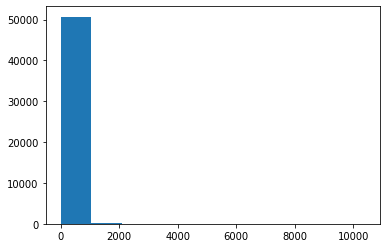

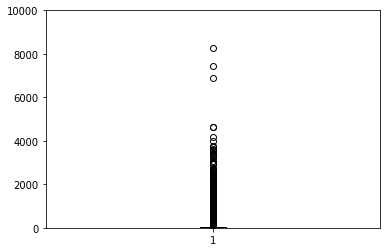

In [38]:
# 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# > 단어 개수 확인
print("전체 단어 개수:", len(tokenizer.word_index))
print("빈도수 3이상인 단어 개수:", len([token for token, count in tokenizer.word_counts.items() if count >= 3]))
print("빈도수 4이상인 단어 개수:", len([token for token, count in tokenizer.word_counts.items() if count >= 4]))
plt.subplots()
plt.hist(list(tokenizer.word_counts.values()))
plt.subplots()
plt.boxplot(list(tokenizer.word_counts.values()))
plt.ylim(0, 10000);

In [39]:
# 정수 인코딩
tokenizer = Tokenizer(20000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
print("# int_encoding done")

# int_encoding done


최대 토큰 개수: 40


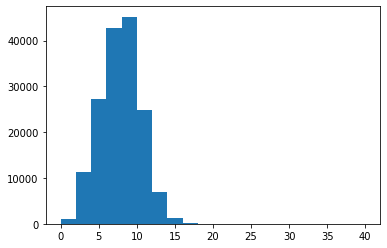

In [40]:
# padding
# > max_len 확인
print("최대 토큰 개수:", max([len(x) for x in X_train]))
plt.hist([len(x) for x in X_train], bins=20);

In [41]:
# padding
X_train = pad_sequences(X_train, maxlen=15)
X_test = pad_sequences(X_test, maxlen=15)
print("# padding done")

# padding done


### model1) simple RNN

In [42]:
model1 = Sequential()
model1.add(Embedding(20000, 32))
model1.add(SimpleRNN(32))
model1.add(Dense(41, activation='softmax'))

In [43]:
model1.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=128)

Epoch 1/6
1256/1256 [==============================] - 16s 12ms/step - loss: 2.6462 - accuracy: 0.3263 - val_loss: 2.1927 - val_accuracy: 0.4346
Epoch 2/6
1256/1256 [==============================] - 15s 12ms/step - loss: 1.9067 - accuracy: 0.4993 - val_loss: 1.9179 - val_accuracy: 0.4973
Epoch 3/6
1256/1256 [==============================] - 15s 12ms/step - loss: 1.6318 - accuracy: 0.5641 - val_loss: 1.8591 - val_accuracy: 0.5120
Epoch 4/6
1256/1256 [==============================] - 15s 12ms/step - loss: 1.4508 - accuracy: 0.6069 - val_loss: 1.8631 - val_accuracy: 0.5151
Epoch 5/6
1256/1256 [==============================] - 15s 12ms/step - loss: 1.3076 - accuracy: 0.6434 - val_loss: 1.9021 - val_accuracy: 0.5071
Epoch 6/6
1256/1256 [==============================] - 15s 12ms/step - loss: 1.1852 - accuracy: 0.6752 - val_loss: 1.9496 - val_accuracy: 0.5064


In [44]:
model1.evaluate(X_test, y_test)

1256/1256 [==============================] - 2s 2ms/step - loss: 1.9496 - accuracy: 0.5064


[1.9496369361877441, 0.5063602924346924]

### model2) LSTM

In [45]:
model2 = Sequential()
model2.add(Embedding(20000, 32))
model2.add(LSTM(32))
model2.add(Dense(41, activation='softmax'))

In [46]:
model2.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=128)

Epoch 1/6
1256/1256 [==============================] - 24s 19ms/step - loss: 2.5159 - accuracy: 0.3551 - val_loss: 1.9836 - val_accuracy: 0.4792
Epoch 2/6
1256/1256 [==============================] - 24s 19ms/step - loss: 1.7157 - accuracy: 0.5417 - val_loss: 1.7108 - val_accuracy: 0.5416
Epoch 3/6
1256/1256 [==============================] - 24s 19ms/step - loss: 1.4261 - accuracy: 0.6078 - val_loss: 1.6509 - val_accuracy: 0.5581
Epoch 4/6
1256/1256 [==============================] - 24s 19ms/step - loss: 1.2639 - accuracy: 0.6464 - val_loss: 1.6273 - val_accuracy: 0.5636
Epoch 5/6
1256/1256 [==============================] - 24s 19ms/step - loss: 1.1422 - accuracy: 0.6777 - val_loss: 1.6618 - val_accuracy: 0.5602
Epoch 6/6
1256/1256 [==============================] - 24s 19ms/step - loss: 1.0423 - accuracy: 0.7037 - val_loss: 1.6743 - val_accuracy: 0.5605


In [47]:
model2.evaluate(X_test, y_test)

1256/1256 [==============================] - 3s 2ms/step - loss: 1.6743 - accuracy: 0.5605


[1.6743135452270508, 0.560478925704956]

### model3) CNN

In [49]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Flatten

In [53]:
model3 = Sequential()
model3.add(Embedding(20000, 25))
model3.add(Conv1D(25, 3, padding='valid', activation='relu'))
model3.add(GlobalMaxPooling1D())
model3.add(Flatten())
model3.add(Dense(41, activation='softmax'))

In [54]:
model3.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=128)

Epoch 1/6
1256/1256 [==============================] - 11s 9ms/step - loss: 2.5925 - accuracy: 0.3495 - val_loss: 2.0996 - val_accuracy: 0.4662
Epoch 2/6
1256/1256 [==============================] - 11s 9ms/step - loss: 1.8463 - accuracy: 0.5233 - val_loss: 1.8547 - val_accuracy: 0.5216
Epoch 3/6
1256/1256 [==============================] - 11s 9ms/step - loss: 1.5649 - accuracy: 0.5815 - val_loss: 1.7778 - val_accuracy: 0.5370
Epoch 4/6
1256/1256 [==============================] - 11s 8ms/step - loss: 1.3817 - accuracy: 0.6223 - val_loss: 1.7648 - val_accuracy: 0.5399
Epoch 5/6
1256/1256 [==============================] - 11s 9ms/step - loss: 1.2429 - accuracy: 0.6564 - val_loss: 1.7838 - val_accuracy: 0.5400
Epoch 6/6
1256/1256 [==============================] - 15s 12ms/step - loss: 1.1289 - accuracy: 0.6872 - val_loss: 1.8262 - val_accuracy: 0.5360


In [52]:
model3.evaluate(X_test, y_test)

1256/1256 [==============================] - 6s 5ms/step - loss: 2.3504 - accuracy: 0.5511


[2.3503522872924805, 0.5510692000389099]